# [Task2 Stance Results]
The title of the notebook should be coherent with file name. Namely, file name should be:    
*author's initials_progressive number_title.ipynb*    
For example:    
*EF_01_Data Exploration.ipynb*

## Purpose
State the purpose of the notebook.

## Methodology
Quickly describe assumptions and processing steps.

## WIP - improvements
Use this section only if the notebook is not final.

Notable TODOs:
- todo 1;
- todo 2;
- todo 3.

## Results
Describe and comment the most important results.

## Suggested next steps
State suggested next steps, based on results obtained in this notebook.

# Setup

## Library import
We import all the required Python libraries

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os,sys
import joblib
from os import path

# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Common things
from sklearn.metrics import classification_report
# from scipy import stats

# Visualizations
# import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style("white") # darkgrid, whitegrid, dark, white, and ticks
# plt.figure(figsize=(7, 7))

# Autoreload extension
# if 'autoreload' not in get_ipython().extension_manager.loaded:
#     %load_ext autoreload
    
# %autoreload 2

In [3]:
# Examples seaborn
# with sns.axes_style("whitegrid"):
#     fig, axis = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
#     fig.suptitle(f'Position distribution on splits')
#     sns.boxplot(ax=axis[0], data=df_prep, y='event', x='ith_pos', order=event_label_map.values())
#     sns.boxplot(ax=axis[1], data=pd.read_pickle(path.join(DATA_PATH, "stage2_test.pkl") ), y='event', x='ith_pos', order=event_label_map.values())

## Local library import
We import all the required local libraries libraries

In [4]:
# Include local library paths
import sys
# sys.path.append('path/to/local/lib') # uncomment and fill to import local libraries
# add project folders so local libraries can be imported
sys.path.insert(1, os.path.join(os.getcwd()  , '..'))
sys.path.insert(1, os.path.join(os.getcwd()  , '../src'))

# Import local libraries
# from plibs.utils import corrstats
from src.plibs.utils import plots as myplots

In [5]:
# notebook misc functions
def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

def displayAll(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):	
        display(df)  

# Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.

In [6]:
# *** parameters for GUILD tracked projects ****
%env GUILD_HOME=../tracking/.guild
#os.environ['GUILD_HOME']
from guild import ipy
GUILD_HOME = ipy.guild_home()

# RUN_ID = "df2d52de187f4ed0ba5c1f10ed7bfab7" # example
# #RUN_PATH = f"{ipy.guild_home()}/runs"
# RUN_PATH = f"{ipy.guild_home()}/runs/{RUN_ID}"
# os.listdir(RUN_PATH)

def run_path(runid) -> str:
    return f"{ipy.guild_home()}/runs/{runid}"

def run_files(runid):
    return os.listdir(run_path(runid))

env: GUILD_HOME=../tracking/.guild


In [8]:
def check_predictions(fpath, ytrue_label, yhat_label, label_mapping=['AGAINST', 'FAVOR', 'NONE'], sep=','):
    rs = pd.read_csv(fpath ,sep=sep)
    print(rs.shape)
    if label_mapping is not None:
        rs['ytrue_label'] = rs[ytrue_label].map(lambda x: label_mapping[x]) 
        rs['yhat_label'] = rs[yhat_label].map(lambda x: label_mapping[x]) 
    else:
        rs['ytrue_label'] = rs[ytrue_label]
        rs['yhat_label'] = rs[yhat_label]     
    display(rs.head())
    print(classification_report(rs.ytrue_label, rs.yhat_label, digits=3))
    myplots.my_plot_confusionmatrix(rs.ytrue_label, rs.yhat_label)
    return rs

def check_trainrun_results(runid):
    rs = pd.read_csv(path.join(run_path(runid), "test_predictions.csv") )
    print(rs.shape)
    rs['ytrue_label'] = rs['ytrue_label'].map(lambda x: stance_labels[x]) 
    rs['yhat_label'] = rs['yhat_label'].map(lambda x: stance_labels[x]) 
    display(rs.head())
    print(classification_report(rs.ytrue_label, rs.yhat_label, digits=3))
    myplots.my_plot_confusionmatrix(rs.ytrue_label, rs.yhat_label)
    return rs

def check_inference_results(runid, ytrue_label='labels', yhat_label='yhat'):
    rs = pd.read_csv(path.join(run_path(runid), "predictions.tsv"), sep='\t' )
    print(rs.shape)
    # rs['ytrue_label'] = rs[ytrue_label].map(lambda x: stance_labels[x]) 
    # rs['yhat_label'] = rs[yhat_label].map(lambda x: stance_labels[x]) 
    rs['ytrue_label'] = rs['Stance'] 
    rs['yhat_label'] = rs['yhat_label']     
    display(rs.head())
    print(classification_report(rs.ytrue_label, rs.yhat_label, digits=3))
    myplots.my_plot_confusionmatrix(rs.ytrue_label, rs.yhat_label)
    return rs    


# Data import
We retrieve all the required data for the analysis.

In [9]:
stance_labels = ['AGAINST', 'FAVOR', 'NONE']

(525, 4)


,yhat,ytrue,ytrue_label,yhat_label
0,1,2,NONE,FAVOR
1,2,2,NONE,NONE
2,0,1,FAVOR,AGAINST
3,0,0,AGAINST,AGAINST
4,1,1,FAVOR,FAVOR


              precision    recall  f1-score   support

     AGAINST      0.808     0.849     0.828       139
       FAVOR      0.838     0.921     0.878       214
        NONE      0.868     0.727     0.791       172

    accuracy                          0.838       525
   macro avg      0.838     0.832     0.832       525
weighted avg      0.840     0.838     0.836       525



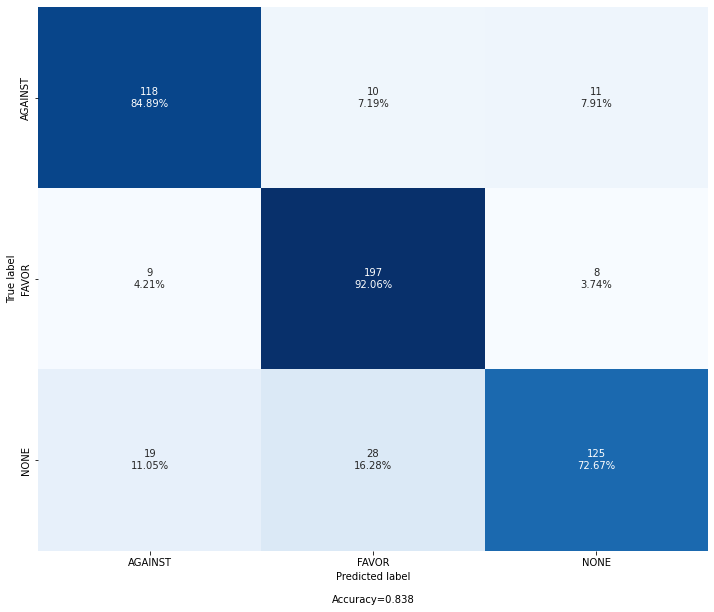

In [10]:
rs = check_trainrun_results("ed3acaf25997403fbb927943a63cd3b8")

### CT-BERT trained in CovidLies tested in official data

(525, 16)


,Unnamed: 0,id,Tweet,Claim,Stance,Premise,tweet_text,tweet_text_clean,labels,Claim2,groupkey,logits_0,logits_1,logits_2,yhat,yhat_label,ytrue_label
0,540,790606768,.@DallasISDMedia NO IN PERSON SCHOOL @ least t...,school closures,NONE,0,.@DallasISDMedia NO IN PERSON SCHOOL @ least t...,. @USER NO IN PERSON SCHOOL @ least through La...,2,Schools need to remain closed.,NONE | school closures,0.977710,0.009786,0.012505,0,AGAINST,NONE
1,444,1535035885,:notes::arrow_forward:Firework @katyperry On ...,stay at home orders,NONE,0,:notes::arrow_forward:Firework @katyperry On ...,:notes::arrow_forward:Firework @USER On Totori...,2,Stay at home is a needed measure.,NONE | stay at home orders,0.094040,0.018626,0.887334,2,NONE,NONE
2,598,659269,@TheLalasventure @doqholliday @realDonaldTrump...,face masks,FAVOR,0,@TheLalasventure @doqholliday @realDonaldTrump...,@USER @USER @USER Houston really does have a ...,1,Face masks help to protect us.,FAVOR | face masks,0.011341,0.006808,0.981851,2,NONE,FAVOR
3,451,230078,@lc5190 Ever noticed how masks-wearers are con...,face masks,AGAINST,0,@lc5190 Ever noticed how masks-wearers are con...,@USER Ever noticed how masks-wearers are cont...,0,Face masks help to protect us.,AGAINST | face masks,0.089589,0.029169,0.881242,2,NONE,AGAINST
4,246,141134,When you have people listening to you (as dumb...,stay at home orders,FAVOR,0,When you have people listening to you (as dumb...,When you have people listening to you (as dumb...,1,Stay at home is a needed measure.,FAVOR | stay at home orders,0.512768,0.087696,0.399536,0,AGAINST,FAVOR


              precision    recall  f1-score   support

     AGAINST       0.16      0.12      0.14       139
       FAVOR       0.94      0.08      0.15       214
        NONE       0.39      0.91      0.54       172

    accuracy                           0.36       525
   macro avg       0.50      0.37      0.28       525
weighted avg       0.55      0.36      0.27       525



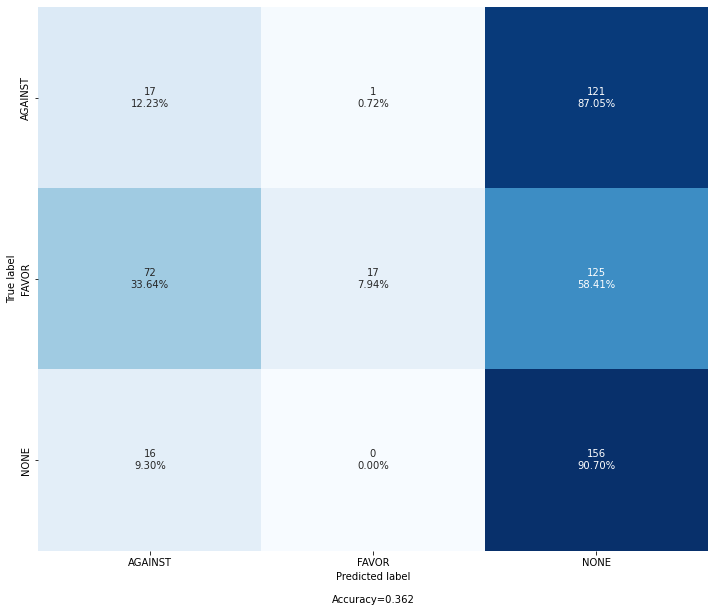

In [18]:
rs = check_inference_results("0e7cfb20b4264892aaf02bdcd7432429")

### CT-BERT trained in CovidLies and continue training in Official data

(525, 4)


,yhat,ytrue,ytrue_label,yhat_label
0,1,2,NONE,FAVOR
1,2,2,NONE,NONE
2,0,1,FAVOR,AGAINST
3,0,0,AGAINST,AGAINST
4,1,1,FAVOR,FAVOR


              precision    recall  f1-score   support

     AGAINST      0.753     0.878     0.811       139
       FAVOR      0.914     0.841     0.876       214
        NONE      0.837     0.808     0.822       172

    accuracy                          0.840       525
   macro avg      0.835     0.842     0.836       525
weighted avg      0.846     0.840     0.841       525



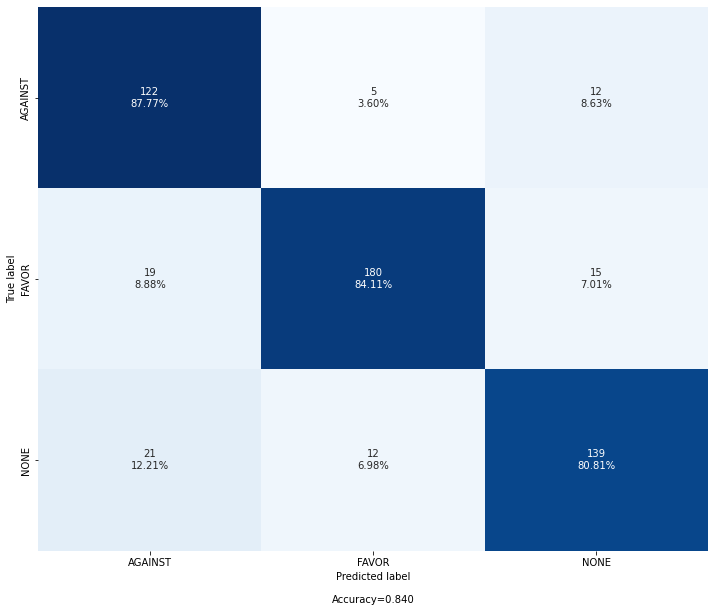

In [11]:
rs = check_trainrun_results("e889d14d42464147a3629f0fbeabe5f5")

### CT-BERT trained in CovidLies and continue training in Official data but passing to the classification header the sentiment logits

(525, 4)


,yhat,ytrue,ytrue_label,yhat_label
0,1,2,NONE,FAVOR
1,2,2,NONE,NONE
2,0,1,FAVOR,AGAINST
3,0,0,AGAINST,AGAINST
4,1,1,FAVOR,FAVOR


              precision    recall  f1-score   support

     AGAINST      0.827     0.827     0.827       139
       FAVOR      0.872     0.925     0.898       214
        NONE      0.830     0.767     0.798       172

    accuracy                          0.848       525
   macro avg      0.843     0.840     0.841       525
weighted avg      0.847     0.848     0.846       525



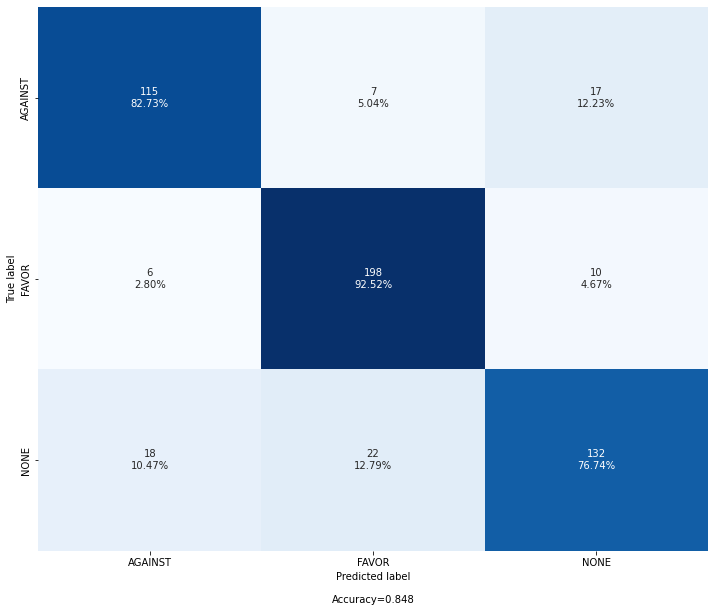

In [12]:
rs = check_predictions("/home/owlmx/research/comps/SMM4H22/data/ouputs/e2708f19f2374749a5ec6abbce178f44_test_predictions.csv", ytrue_label='ytrue', yhat_label='yhat')

# Ensembling

## CT-BERT two-stage + sentiment logits x

In [29]:
df_train = pd.read_csv(path.join(run_path("cd50be6436b4445da5091a39477f8c44"), "task2_train_predictions_predictions.tsv"), sep='\t') 
df_valid = pd.read_csv(path.join(run_path("cd50be6436b4445da5091a39477f8c44"), "task2_valid_predictions_predictions.tsv"), sep='\t') 
df_test = pd.read_csv(path.join(run_path("cd50be6436b4445da5091a39477f8c44"), "task2_test_predictions_predictions.tsv"), sep='\t') 

In [33]:
df_train.head()[[f for f in df_train.columns if 'logits_' in f]]
display(df_train.head())

,Unnamed: 0,id,Tweet,Claim,Stance,Premise,tweet_text,tweet_text_clean,labels,Claim2,groupkey,logits_0,logits_1,logits_2,yhat,yhat_label,stance_logits_0,stance_logits_1,stance_logits_2,stance_yhat,stance_yhat_label
0,1168,3523150,@TheRightMelissa SERIOUS QUESTION ~ If you had...,face masks,AGAINST,1,@TheRightMelissa SERIOUS QUESTION ~ If you had...,@USER SERIOUS QUESTION ~ If you had ONLY 7 da...,0,Face masks help to protect us.,AGAINST | face masks,0.363888,0.581634,0.054477,1,Neutral,0.958239,0.019068,0.022694,0,AGAINST
1,3450,5234053527803,This should be the last #lockdown Come Septem...,stay at home orders,AGAINST,1,This should be the last #lockdown Come Septem...,This should be the last lockdown Come Septembe...,0,Stay at home is a needed measure.,AGAINST | stay at home orders,0.889972,0.099474,0.010553,0,Negative,0.965355,0.015641,0.019004,0,AGAINST
2,1831,4134668835,@drdavidsamadi California...need I say more? :...,stay at home orders,NONE,0,@drdavidsamadi California...need I say more? :...,@USER California...need I say more? :folded_h...,2,Stay at home is a needed measure.,NONE | stay at home orders,0.789607,0.201381,0.009013,0,Negative,0.021134,0.036980,0.941886,2,NONE
3,2443,1813681,I bet if we went around telling anti-maskers t...,face masks,FAVOR,0,I bet if we went around telling anti-maskers t...,I bet if we went around telling anti-maskers t...,1,Face masks help to protect us.,FAVOR | face masks,0.606613,0.370846,0.022541,0,Negative,0.005248,0.959175,0.035577,1,FAVOR
4,999,789840,Democrats and the teachers' unions don't care ...,school closures,AGAINST,1,Democrats and the teachers' unions don't care ...,Democrats and the teachers' unions don't care ...,0,Schools need to remain closed.,AGAINST | school closures,0.895765,0.096582,0.007653,0,Negative,0.952307,0.025290,0.022403,0,AGAINST


In [47]:
from sklearn.ensemble import RandomForestClassifier
import joblib

In [51]:
def exp_ensemble(estimator = None):
    if not estimator:
        estimator = RandomForestClassifier()
        df_tmp_x = df_train[[f for f in df_train.columns if 'logits_' in f]]
        df_tmp_y = df_train[['labels']]
        df_tmp_x = df_tmp_x.append(df_valid[[f for f in df_valid.columns if 'logits_' in f]])
        df_tmp_y = df_tmp_y.append(df_valid[['labels']])
        estimator.fit(df_tmp_x, df_tmp_y['labels'])
    yhats = estimator.predict(df_test[[f for f in df_test.columns if 'logits_' in f]])

    ytrues = list(map(lambda v: stance_labels[v], df_test['labels']))
    yhats = list(map(lambda v: stance_labels[v], yhats))
    print(classification_report(ytrues, yhats))
    return estimator

In [ ]:
estimator = exp_ensemble()

In [48]:
joblib.dump(estimator, "../models/task2_stance_rf-ensemble_stance-sent.joblib")

['../models/task2_stance_rf-ensemble_stance-sent.joblib']

In [52]:
exp_ensemble(estimator=joblib.load("../models/task2_stance_rf-ensemble_stance-sent.joblib"))

              precision    recall  f1-score   support

     AGAINST       0.82      0.85      0.83       139
       FAVOR       0.88      0.86      0.87       214
        NONE       0.81      0.80      0.80       172

    accuracy                           0.84       525
   macro avg       0.83      0.84      0.84       525
weighted avg       0.84      0.84      0.84       525



RandomForestClassifier()

# References
We report here relevant references:
1. author1, article1, journal1, year1, url1
2. author2, article2, journal2, year2, url2

(525, 21)


,Unnamed: 0,id,Tweet,Claim,Stance,Premise,tweet_text,tweet_text_clean,labels,Claim2,groupkey,logits_0,logits_1,logits_2,yhat,yhat_label,stance_logits_0,stance_logits_1,stance_logits_2,stance_yhat,stance_yhat_label,ytrue_label
0,540,790606768,.@DallasISDMedia NO IN PERSON SCHOOL @ least t...,school closures,NONE,0,.@DallasISDMedia NO IN PERSON SCHOOL @ least t...,. @USER NO IN PERSON SCHOOL @ least through La...,2,Schools need to remain closed.,NONE | school closures,0.557892,0.430706,0.011402,0,FAVOR,0.005897,0.834479,0.159624,1,FAVOR,NONE
1,444,1535035885,:notes::arrow_forward:Firework @katyperry On ...,stay at home orders,NONE,0,:notes::arrow_forward:Firework @katyperry On ...,:notes::arrow_forward:Firework @USER On Totori...,2,Stay at home is a needed measure.,NONE | stay at home orders,0.012131,0.860727,0.127142,1,NONE,0.001104,0.001132,0.997764,2,NONE,NONE
2,598,659269,@TheLalasventure @doqholliday @realDonaldTrump...,face masks,FAVOR,0,@TheLalasventure @doqholliday @realDonaldTrump...,@USER @USER @USER Houston really does have a ...,1,Face masks help to protect us.,FAVOR | face masks,0.916435,0.077408,0.006157,0,AGAINST,0.960875,0.008165,0.030960,0,AGAINST,FAVOR
3,451,230078,@lc5190 Ever noticed how masks-wearers are con...,face masks,AGAINST,0,@lc5190 Ever noticed how masks-wearers are con...,@USER Ever noticed how masks-wearers are cont...,0,Face masks help to protect us.,AGAINST | face masks,0.165600,0.783679,0.050722,1,AGAINST,0.961751,0.014619,0.023630,0,AGAINST,AGAINST
4,246,141134,When you have people listening to you (as dumb...,stay at home orders,FAVOR,0,When you have people listening to you (as dumb...,When you have people listening to you (as dumb...,1,Stay at home is a needed measure.,FAVOR | stay at home orders,0.934332,0.058318,0.007349,0,FAVOR,0.004064,0.962345,0.033591,1,FAVOR,FAVOR


              precision    recall  f1-score   support

     AGAINST       0.83      0.83      0.83       139
       FAVOR       0.87      0.93      0.90       214
        NONE       0.83      0.77      0.80       172

    accuracy                           0.85       525
   macro avg       0.84      0.84      0.84       525
weighted avg       0.85      0.85      0.85       525



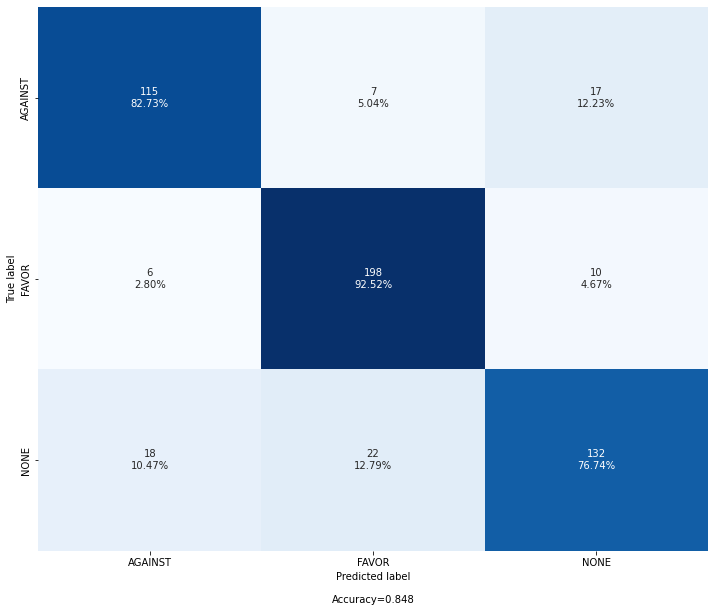

In [14]:
rs = check_predictions("/home/owlmx/research/comps/SMM4H22/data/ouputs/f3192607159d4a9fb23a0b5d9af5634c_predictions.tsv", 
ytrue_label='labels', yhat_label='stance_yhat', sep='\t')

## Experiment two-stage + joint learning Stance&Premise

(525, 18)


,Unnamed: 0,id,Tweet,Claim,Stance,Premise,tweet_text,tweet_text_clean,labels,Claim2,groupkey,stance_labels_logits_0,stance_labels_logits_1,stance_labels_logits_2,stance_labels_yhat,stance_Premise_logits_0,stance_Premise_logits_1,stance_Premise_yhat,ytrue_label,yhat_label
0,540,790606768,.@DallasISDMedia NO IN PERSON SCHOOL @ least t...,school closures,NONE,0,.@DallasISDMedia NO IN PERSON SCHOOL @ least t...,. @USER NO IN PERSON SCHOOL @ least through La...,2,Schools need to remain closed.,NONE | school closures,0.016002,0.404117,0.579881,2,0.946113,0.053887,0,NONE,NONE
1,444,1535035885,:notes::arrow_forward:Firework @katyperry On ...,stay at home orders,NONE,0,:notes::arrow_forward:Firework @katyperry On ...,:notes::arrow_forward:Firework @USER On Totori...,2,Stay at home is a needed measure.,NONE | stay at home orders,0.000865,0.001814,0.997322,2,0.999014,0.000986,0,NONE,NONE
2,598,659269,@TheLalasventure @doqholliday @realDonaldTrump...,face masks,FAVOR,0,@TheLalasventure @doqholliday @realDonaldTrump...,@USER @USER @USER Houston really does have a ...,1,Face masks help to protect us.,FAVOR | face masks,0.765883,0.031109,0.203008,0,0.900813,0.099187,0,FAVOR,AGAINST
3,451,230078,@lc5190 Ever noticed how masks-wearers are con...,face masks,AGAINST,0,@lc5190 Ever noticed how masks-wearers are con...,@USER Ever noticed how masks-wearers are cont...,0,Face masks help to protect us.,AGAINST | face masks,0.894770,0.013212,0.092018,0,0.833814,0.166186,0,AGAINST,AGAINST
4,246,141134,When you have people listening to you (as dumb...,stay at home orders,FAVOR,0,When you have people listening to you (as dumb...,When you have people listening to you (as dumb...,1,Stay at home is a needed measure.,FAVOR | stay at home orders,0.002726,0.964604,0.032670,1,0.175218,0.824782,1,FAVOR,FAVOR


              precision    recall  f1-score   support

     AGAINST      0.867     0.799     0.831       139
       FAVOR      0.862     0.907     0.884       214
        NONE      0.831     0.831     0.831       172

    accuracy                          0.853       525
   macro avg      0.854     0.845     0.849       525
weighted avg      0.853     0.853     0.853       525



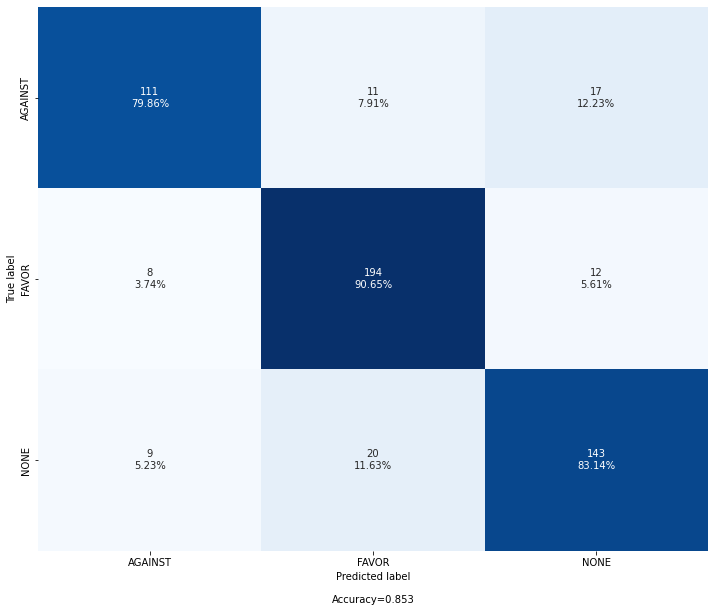

In [13]:
rs = check_predictions("/home/owlmx/research/comps/SMM4H22/data/ouputs/64cf4630746047909d92e0687368f7e7_predictions.tsv", ytrue_label='labels', yhat_label='stance_labels_yhat', sep='\t')

(525, 21)


,Unnamed: 0,id,Tweet,Claim,Stance,Premise,tweet_text,tweet_text_clean,labels,Claim2,groupkey,logits_0,logits_1,logits_2,yhat,yhat_label,stance_logits_0,stance_logits_1,stance_logits_2,stance_yhat,stance_yhat_label,ytrue_label
0,540,790606768,.@DallasISDMedia NO IN PERSON SCHOOL @ least t...,school closures,NONE,0,.@DallasISDMedia NO IN PERSON SCHOOL @ least t...,. @USER NO IN PERSON SCHOOL @ least through La...,2,Schools need to remain closed.,NONE | school closures,0.557892,0.430706,0.011402,0,FAVOR,0.005897,0.834479,0.159624,1,FAVOR,NONE
1,444,1535035885,:notes::arrow_forward:Firework @katyperry On ...,stay at home orders,NONE,0,:notes::arrow_forward:Firework @katyperry On ...,:notes::arrow_forward:Firework @USER On Totori...,2,Stay at home is a needed measure.,NONE | stay at home orders,0.012131,0.860727,0.127142,1,NONE,0.001104,0.001132,0.997764,2,NONE,NONE
2,598,659269,@TheLalasventure @doqholliday @realDonaldTrump...,face masks,FAVOR,0,@TheLalasventure @doqholliday @realDonaldTrump...,@USER @USER @USER Houston really does have a ...,1,Face masks help to protect us.,FAVOR | face masks,0.916435,0.077408,0.006157,0,AGAINST,0.960875,0.008165,0.030960,0,AGAINST,FAVOR
3,451,230078,@lc5190 Ever noticed how masks-wearers are con...,face masks,AGAINST,0,@lc5190 Ever noticed how masks-wearers are con...,@USER Ever noticed how masks-wearers are cont...,0,Face masks help to protect us.,AGAINST | face masks,0.165600,0.783679,0.050722,1,AGAINST,0.961751,0.014619,0.023630,0,AGAINST,AGAINST
4,246,141134,When you have people listening to you (as dumb...,stay at home orders,FAVOR,0,When you have people listening to you (as dumb...,When you have people listening to you (as dumb...,1,Stay at home is a needed measure.,FAVOR | stay at home orders,0.934332,0.058318,0.007349,0,FAVOR,0.004064,0.962345,0.033591,1,FAVOR,FAVOR


              precision    recall  f1-score   support

     AGAINST       0.83      0.83      0.83       139
       FAVOR       0.87      0.93      0.90       214
        NONE       0.83      0.77      0.80       172

    accuracy                           0.85       525
   macro avg       0.84      0.84      0.84       525
weighted avg       0.85      0.85      0.85       525



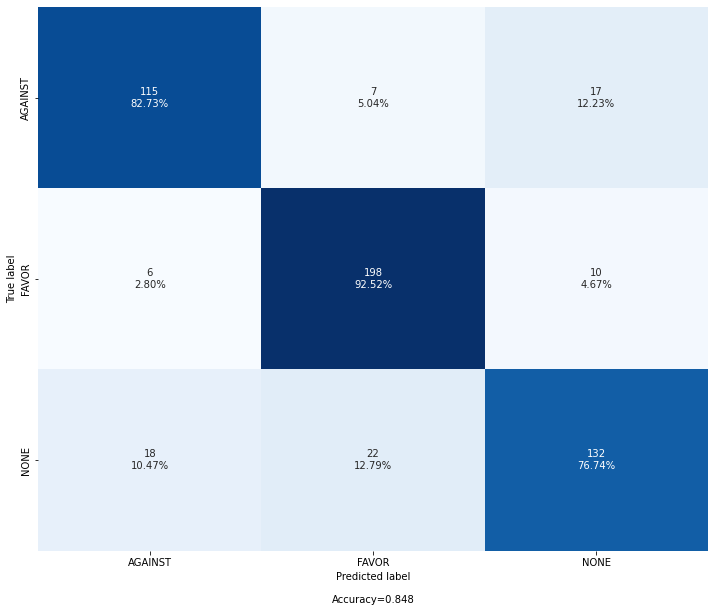

In [ ]:
rs = check_predictions("/home/owlmx/research/comps/SMM4H22/data/ouputs/f3192607159d4a9fb23a0b5d9af5634c_predictions.tsv", 
ytrue_label='labels', yhat_label='stance_yhat', sep='\t')

(525, 18)


,Unnamed: 0,id,Tweet,Claim,Stance,Premise,tweet_text,tweet_text_clean,labels,Claim2,groupkey,stance_labels_logits_0,stance_labels_logits_1,stance_labels_logits_2,stance_labels_yhat,stance_Premise_logits_0,stance_Premise_logits_1,stance_Premise_yhat,ytrue_label,yhat_label
0,540,790606768,.@DallasISDMedia NO IN PERSON SCHOOL @ least t...,school closures,NONE,0,.@DallasISDMedia NO IN PERSON SCHOOL @ least t...,. @USER NO IN PERSON SCHOOL @ least through La...,2,Schools need to remain closed.,NONE | school closures,0.016002,0.404117,0.579881,2,0.946113,0.053887,0,AGAINST,AGAINST
1,444,1535035885,:notes::arrow_forward:Firework @katyperry On ...,stay at home orders,NONE,0,:notes::arrow_forward:Firework @katyperry On ...,:notes::arrow_forward:Firework @USER On Totori...,2,Stay at home is a needed measure.,NONE | stay at home orders,0.000865,0.001814,0.997322,2,0.999014,0.000986,0,AGAINST,AGAINST
2,598,659269,@TheLalasventure @doqholliday @realDonaldTrump...,face masks,FAVOR,0,@TheLalasventure @doqholliday @realDonaldTrump...,@USER @USER @USER Houston really does have a ...,1,Face masks help to protect us.,FAVOR | face masks,0.765883,0.031109,0.203008,0,0.900813,0.099187,0,AGAINST,AGAINST
3,451,230078,@lc5190 Ever noticed how masks-wearers are con...,face masks,AGAINST,0,@lc5190 Ever noticed how masks-wearers are con...,@USER Ever noticed how masks-wearers are cont...,0,Face masks help to protect us.,AGAINST | face masks,0.894770,0.013212,0.092018,0,0.833814,0.166186,0,AGAINST,AGAINST
4,246,141134,When you have people listening to you (as dumb...,stay at home orders,FAVOR,0,When you have people listening to you (as dumb...,When you have people listening to you (as dumb...,1,Stay at home is a needed measure.,FAVOR | stay at home orders,0.002726,0.964604,0.032670,1,0.175218,0.824782,1,AGAINST,FAVOR


              precision    recall  f1-score   support

     AGAINST       0.85      0.88      0.87       333
       FAVOR       0.78      0.73      0.75       192

    accuracy                           0.83       525
   macro avg       0.82      0.81      0.81       525
weighted avg       0.82      0.83      0.83       525



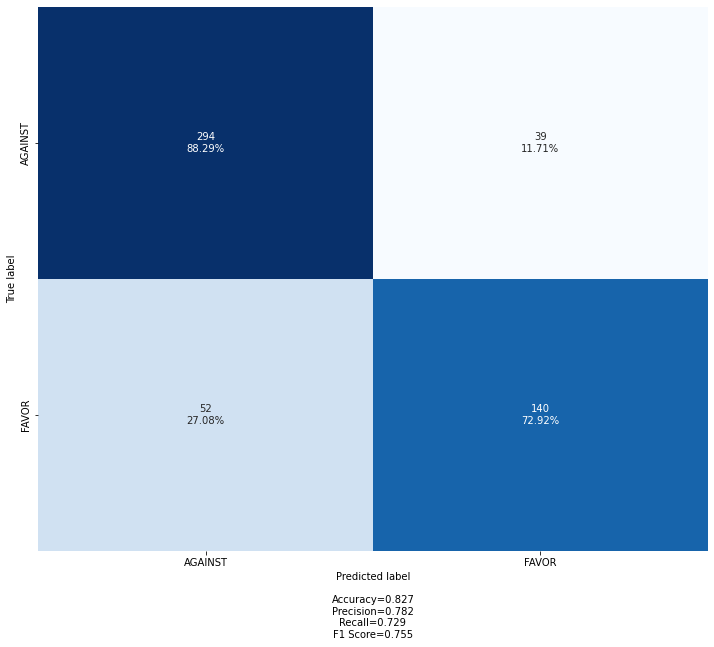

In [18]:
rs = check_predictions("/home/owlmx/research/comps/SMM4H22/data/ouputs/64cf4630746047909d92e0687368f7e7_predictions.tsv", ytrue_label='Premise', yhat_label='stance_Premise_yhat', sep='\t')

## Experiment two-stage + joint learning Stance&Premise + extra sentiment logits

(525, 23)


,Unnamed: 0,id,Tweet,Claim,Stance,Premise,tweet_text,tweet_text_clean,labels,Claim2,groupkey,logits_0,logits_1,logits_2,yhat,yhat_label,stance_labels_logits_0,stance_labels_logits_1,stance_labels_logits_2,stance_labels_yhat,stance_Premise_logits_0,stance_Premise_logits_1,stance_Premise_yhat,ytrue_label
0,540,790606768,.@DallasISDMedia NO IN PERSON SCHOOL @ least t...,school closures,NONE,0,.@DallasISDMedia NO IN PERSON SCHOOL @ least t...,. @USER NO IN PERSON SCHOOL @ least through La...,2,Schools need to remain closed.,NONE | school closures,0.557892,0.430706,0.011402,0,FAVOR,0.008237,0.707009,0.284753,1,0.911176,0.088824,0,NONE
1,444,1535035885,:notes::arrow_forward:Firework @katyperry On ...,stay at home orders,NONE,0,:notes::arrow_forward:Firework @katyperry On ...,:notes::arrow_forward:Firework @USER On Totori...,2,Stay at home is a needed measure.,NONE | stay at home orders,0.012131,0.860727,0.127142,1,NONE,0.000770,0.001940,0.997290,2,0.998094,0.001906,0,NONE
2,598,659269,@TheLalasventure @doqholliday @realDonaldTrump...,face masks,FAVOR,0,@TheLalasventure @doqholliday @realDonaldTrump...,@USER @USER @USER Houston really does have a ...,1,Face masks help to protect us.,FAVOR | face masks,0.916435,0.077408,0.006157,0,AGAINST,0.846678,0.017036,0.136287,0,0.837852,0.162148,0,FAVOR
3,451,230078,@lc5190 Ever noticed how masks-wearers are con...,face masks,AGAINST,0,@lc5190 Ever noticed how masks-wearers are con...,@USER Ever noticed how masks-wearers are cont...,0,Face masks help to protect us.,AGAINST | face masks,0.165600,0.783679,0.050722,1,AGAINST,0.894316,0.008143,0.097541,0,0.801137,0.198863,0,AGAINST
4,246,141134,When you have people listening to you (as dumb...,stay at home orders,FAVOR,0,When you have people listening to you (as dumb...,When you have people listening to you (as dumb...,1,Stay at home is a needed measure.,FAVOR | stay at home orders,0.934332,0.058318,0.007349,0,FAVOR,0.005654,0.952106,0.042241,1,0.134628,0.865372,1,FAVOR


              precision    recall  f1-score   support

     AGAINST      0.855     0.849     0.852       139
       FAVOR      0.845     0.939     0.889       214
        NONE      0.879     0.762     0.816       172

    accuracy                          0.857       525
   macro avg      0.860     0.850     0.853       525
weighted avg      0.859     0.857     0.856       525



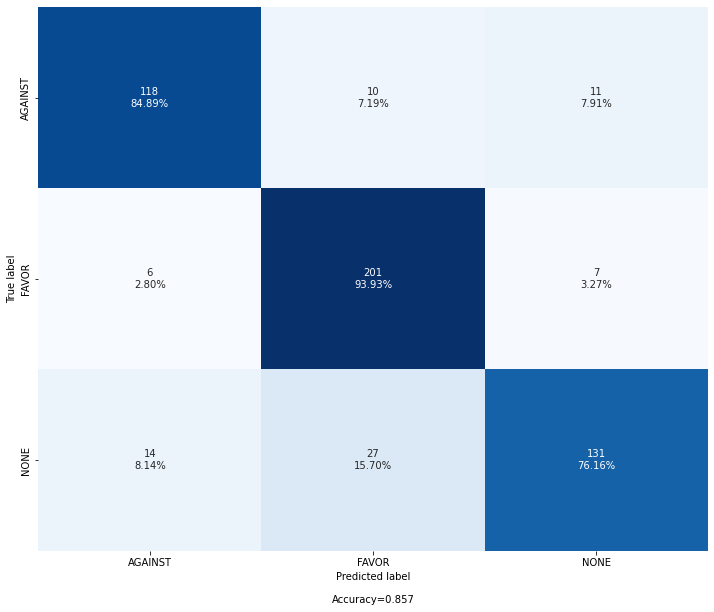

In [14]:
rs = check_predictions("/home/owlmx/research/comps/SMM4H22/data/ouputs/b3ddace3fe0d4d9293c98b80a05763d0_predictions.tsv", ytrue_label='labels', yhat_label='stance_labels_yhat', sep='\t')

(525, 23)


,Unnamed: 0,id,Tweet,Claim,Stance,Premise,tweet_text,tweet_text_clean,labels,Claim2,groupkey,logits_0,logits_1,logits_2,yhat,yhat_label,stance_labels_logits_0,stance_labels_logits_1,stance_labels_logits_2,stance_labels_yhat,stance_Premise_logits_0,stance_Premise_logits_1,stance_Premise_yhat,ytrue_label
0,540,790606768,.@DallasISDMedia NO IN PERSON SCHOOL @ least t...,school closures,NONE,0,.@DallasISDMedia NO IN PERSON SCHOOL @ least t...,. @USER NO IN PERSON SCHOOL @ least through La...,2,Schools need to remain closed.,NONE | school closures,0.557892,0.430706,0.011402,0,NoPremise,0.008237,0.707009,0.284753,1,0.911176,0.088824,0,NoPremise
1,444,1535035885,:notes::arrow_forward:Firework @katyperry On ...,stay at home orders,NONE,0,:notes::arrow_forward:Firework @katyperry On ...,:notes::arrow_forward:Firework @USER On Totori...,2,Stay at home is a needed measure.,NONE | stay at home orders,0.012131,0.860727,0.127142,1,NoPremise,0.000770,0.001940,0.997290,2,0.998094,0.001906,0,NoPremise
2,598,659269,@TheLalasventure @doqholliday @realDonaldTrump...,face masks,FAVOR,0,@TheLalasventure @doqholliday @realDonaldTrump...,@USER @USER @USER Houston really does have a ...,1,Face masks help to protect us.,FAVOR | face masks,0.916435,0.077408,0.006157,0,NoPremise,0.846678,0.017036,0.136287,0,0.837852,0.162148,0,NoPremise
3,451,230078,@lc5190 Ever noticed how masks-wearers are con...,face masks,AGAINST,0,@lc5190 Ever noticed how masks-wearers are con...,@USER Ever noticed how masks-wearers are cont...,0,Face masks help to protect us.,AGAINST | face masks,0.165600,0.783679,0.050722,1,NoPremise,0.894316,0.008143,0.097541,0,0.801137,0.198863,0,NoPremise
4,246,141134,When you have people listening to you (as dumb...,stay at home orders,FAVOR,0,When you have people listening to you (as dumb...,When you have people listening to you (as dumb...,1,Stay at home is a needed measure.,FAVOR | stay at home orders,0.934332,0.058318,0.007349,0,Premise,0.005654,0.952106,0.042241,1,0.134628,0.865372,1,NoPremise


              precision    recall  f1-score   support

   NoPremise       0.87      0.83      0.85       333
     Premise       0.73      0.78      0.76       192

    accuracy                           0.82       525
   macro avg       0.80      0.81      0.80       525
weighted avg       0.82      0.82      0.82       525



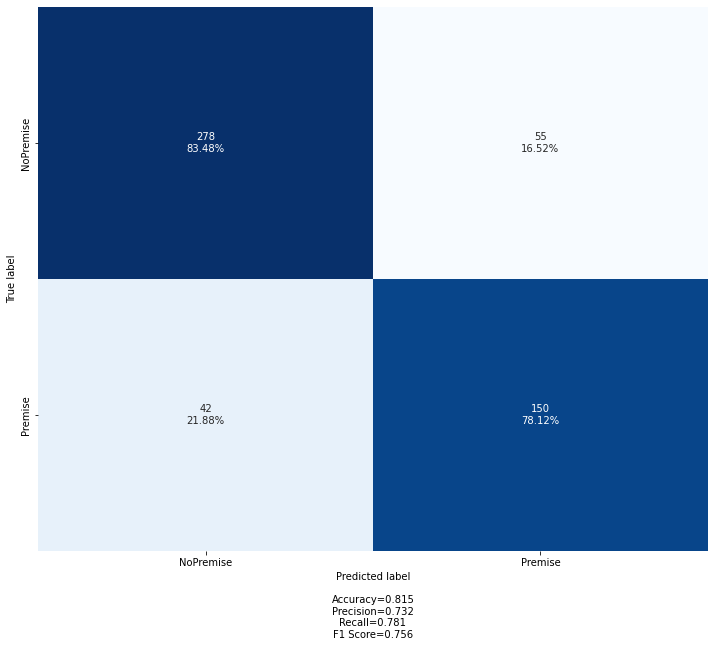

In [35]:
rs = check_predictions("/home/owlmx/research/comps/SMM4H22/data/ouputs/b3ddace3fe0d4d9293c98b80a05763d0_predictions.tsv", ytrue_label='Premise', yhat_label='stance_Premise_yhat', sep='\t', label_mapping=['NoPremise', 'Premise'])

# Analysis results

In [22]:
rs =pd.DataFrame({
    "Setting": ["2st-ft", "2st-ft + sent", "2st-ft + MTL", "2st-ft + sent + MTL"],
    "AGAINST": [0.811,
0.827,
0.831,
0.852],
"FAVOR": [0.876,
0.898,
0.884,
0.889]})

rs

,Setting,AGAINST,FAVOR
0,2st-ft,0.811,0.876
1,2st-ft + sent,0.827,0.898
2,2st-ft + MTL,0.831,0.884
3,2st-ft + sent + MTL,0.852,0.889


In [28]:
rs.melt(id_vars=["Setting"], var_name="class", value_name="f1-score")

,Setting,class,f1-score
0,2st-ft,AGAINST,0.811
1,2st-ft + sent,AGAINST,0.827
2,2st-ft + MTL,AGAINST,0.831
3,2st-ft + sent + MTL,AGAINST,0.852
4,2st-ft,FAVOR,0.876
5,2st-ft + sent,FAVOR,0.898
6,2st-ft + MTL,FAVOR,0.884
7,2st-ft + sent + MTL,FAVOR,0.889


<AxesSubplot:xlabel='Setting', ylabel='f1-score'>

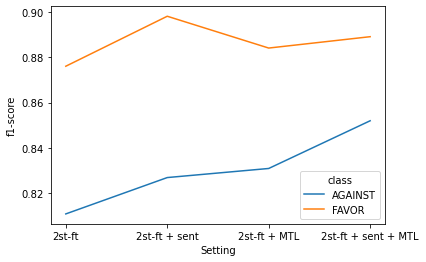

In [30]:
sns.lineplot(data=rs.melt(id_vars=["Setting"], var_name="class", value_name="f1-score"), x="Setting", y="f1-score", hue="class")

<AxesSubplot:xlabel='Setting', ylabel='f1-score'>

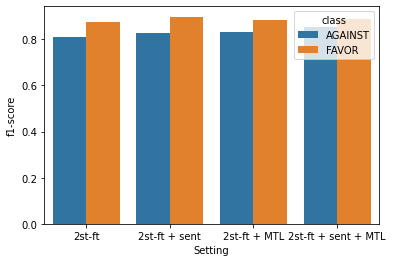

In [31]:
sns.barplot(data=rs.melt(id_vars=["Setting"], var_name="class", value_name="f1-score"), x="Setting", y="f1-score", hue="class")